In [9]:
import brian2 as b2
import random
import matplotlib.pyplot as plt
import numpy as np
#from Neuron import NeuronGroup as neuronGroup

In [54]:
# Neuron model default values
# V_REST = -70 
# V_RESET = -65
# FIRING_THRESHOLD = -50
# MEMBRANE_RESISTANCE = 10.0
# MEMBRANE_TIME_SCALE = 8.0
# ABSOLUTE_REFRACTORY_PERIOD = 2.0

V_REST = -70 
V_RESET = -65
FIRING_THRESHOLD = -50e-3
MEMBRANE_RESISTANCE = 100e6
MEMBRANE_TIME_SCALE = 8.0
ABSOLUTE_REFRACTORY_PERIOD = 2.0


def print_default_parameters():
    """
    Prints the default values
    Returns:

    """
    print("Resting potential: {}".format(V_REST))
    print("Reset voltage: {}".format(V_RESET))
    print("Firing threshold: {}".format(FIRING_THRESHOLD))
    print("Membrane resistance: {}".format(MEMBRANE_RESISTANCE))
    print("Membrane time-scale: {}".format(MEMBRANE_TIME_SCALE))
    print("Absolute refractory period: {}".format(ABSOLUTE_REFRACTORY_PERIOD))


print_default_parameters()

Resting potential: -70
Reset voltage: -65
Firing threshold: -50
Membrane resistance: 10.0
Membrane time-scale: 8.0
Absolute refractory period: 2.0


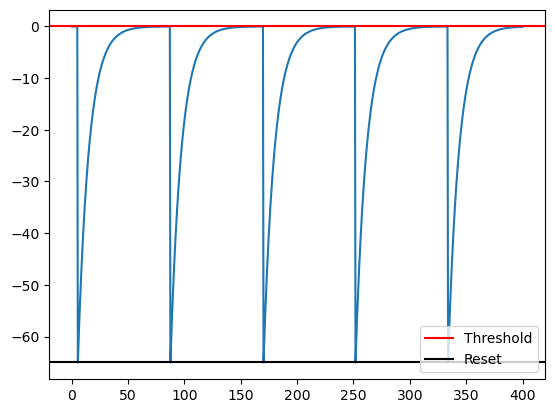

In [246]:
def simulate_LIF_neuron(input_current,
                        simulation_time = 5 * b2.ms,
                        v_rest = V_REST,
                        v_reset = V_RESET,
                        firing_threshold = FIRING_THRESHOLD,
                        membrane_resistance = MEMBRANE_RESISTANCE,
                        membrane_time_scale = MEMBRANE_TIME_SCALE,
                        absolute_refactory_period= ABSOLUTE_REFRACTORY_PERIOD):

    """Basic leaky integrate and fire neuron implementation.

    Args:
        input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
        simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
        v_rest (Quantity): Resting potential: -70mV
        v_reset (Quantity): Reset voltage after spike - 65mV
        firing_threshold (Quantity) Voltage threshold for spiking -50mV
        membrane_resistance (Quantity): 10Mohm
        membrane_time_scale (Quantity): 8ms
        abs_refractory_period (Quantity): 2ms

    Returns:
        StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
        SpikeMonitor: Biran2 SpikeMonitor
    """                    
    eqs = """
        dv/dt =
        ( -(v-v_rest) + membrane_resistance * input_current(t,i) ) / membrane_time_scale : volt (unless refractory)"""
    
    # LIF Neuron using Brian 2 Library
    neuron = b2.NeuronGroup(1, model=eqs, reset ="v=v_reset", 
                            threshold="v>firing_threshold", 
                            refractory=absolute_refactory_period, 
                            method = "linear")

    neuron.v = v_rest 

    varr = np.zeros(int(t_max/time_step))
    for step in varr:
        if step == 0:
            varr[step] = v_rest
        else:
            varr[step] = (-(varr[step-1]-v_rest) + membrane_resistance * input_current(step) )/ membrane_time_scale

    


    return  plt.figure()

plt.figure()
time_step = 0.5
t_max = 400#ms
dt = 1e-3   
tau = 20e-3 
el = -60e-3 
r = 100e6    
i_mean = 25e-11
v = el
vth = -50e-3

input_current = np.linspace(0, t_max,int(t_max/time_step))

vM = np.zeros(int(t_max/time_step))
for step in range(len(vM)):
    t = step * dt

    # Compute value of i at this time step
    i =  np.random.random() * 1.0e-10 * 1.9
   # i = np.random.uniform()
   # random_number = 
    #i = random_number
    i = np.random.uniform(1e-11, 50e-11)
    
    v = v + dt/tau * (el - v + r* i) 

    if(v > vth):
       v = V_RESET
    
    vM[step] = v
    
plt.plot(input_current,vM)
plt.axhline(y=vth, color ='r', label='Threshold')
plt.axhline(y=V_RESET, color='k', label="Reset")
plt.legend()
plt.show()
    






In [205]:
random_number = np.random.uniform(-100.0e-3, 100e-3)
lower_limit = -100.0e-3 # mV
upper_limit = 100.0e-3 # mV

random_number = np.random.uniform(lower_limit, upper_limit)

print(random_number)

i2 = i_mean * np.random.random()
print(i2)


0.02533494738970299
2.2275917744634898e-10


In [249]:
inputarr = np.zeros(int(t_max/time_step))
print(inputarr)


TypeError: 'module' object is not callable